In [43]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [44]:
df_TOCC = pd.read_csv('../../../datasets/TypeOfContractChannel.csv')
df_TOCC[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


### 범주형 / 연속형 : 범주형에 따른 상관관계 확인 


#### 선정 변수: channel(항목 2개), Mileage\[:100\](정규분포)
- 분석 내용: channel 중 서비스방문과 홈쇼핑에 따른 마일리지 평균에 차이가 있는가? 
    - 귀무가설: 평균에 차이 없다. 
    - 대립가설: 평균에 차이 있다. 
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론: pvalue=0.936, 귀무가설이 참. 
    - 사실 결론: 평균에 차이 없다.  ---> 이것만 가지고 인사이트 찾을 수 없다. (인사이트 찾으려면 대립가설이어야 함)

In [45]:
# 검증 대상 항목만 필터링 and 2000개만 추출 (정규분포 자료 획득) 
condition = (df_TOCC['channel'] == '서비스 방문') | (df_TOCC['channel'] == '홈쇼핑/방송')
df_channel_Mileage = df_TOCC[condition][['channel', 'Mileage']][:100]
df_channel_Mileage[:2]

,channel,Mileage
0,서비스 방문,1862.0
1,서비스 방문,2532.0


In [46]:
df_channel_Mileage.isnull().sum()

channel     0
Mileage    14
dtype: int64

In [47]:
df_channel_Mileage = df_channel_Mileage.dropna()

In [48]:
df_channel_Mileage['channel'].value_counts()

서비스 방문    49
홈쇼핑/방송    37
Name: channel, dtype: int64

##### 정규성 검증 
- row 갯수가 5천개를 기준으로 검증 방식 분리 

In [49]:
stats.shapiro(df_channel_Mileage['Mileage'])
# pvalue가 0.5이상이니까 정규분포 

ShapiroResult(statistic=0.9774371981620789, pvalue=0.1371416300535202)

<Axes: xlabel='Mileage', ylabel='Count'>

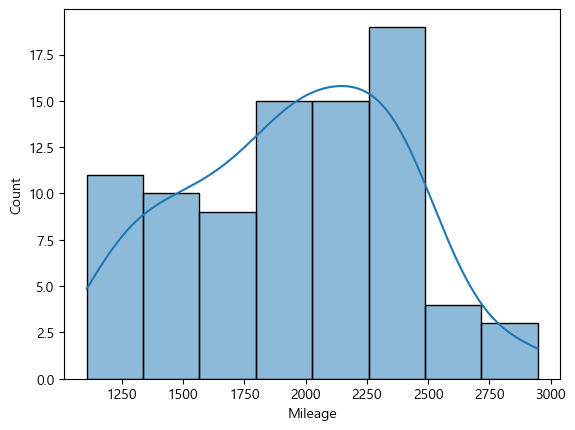

In [50]:
sns.histplot(data=df_channel_Mileage, x='Mileage', kde=True)

##### 등분산 검증
- 평균과 분산이 같다 - 귀무가설 - pvalue 0.05 이상 
- 신은 위대하다. 즉, 분산이 같다
- 결과: pvalue= 0.7445315946688518 등분산이다 

<Axes: xlabel='channel', ylabel='count'>

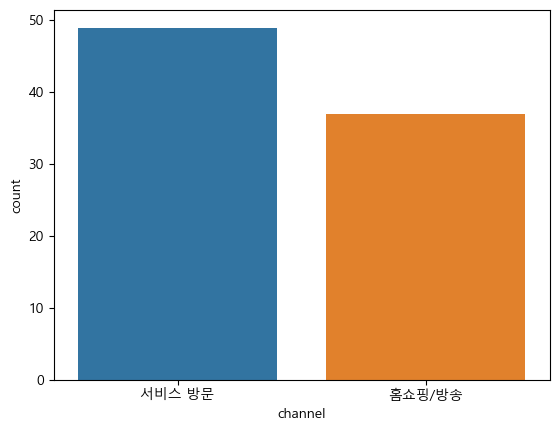

In [51]:
sns.countplot(data=df_channel_Mileage, x='channel')

In [52]:
df_service = df_channel_Mileage[df_channel_Mileage['channel'] == '서비스 방문']
df_service[:2] 

,channel,Mileage
0,서비스 방문,1862.0
1,서비스 방문,2532.0


In [53]:
df_homeshopping = df_channel_Mileage[df_channel_Mileage['channel'] == '홈쇼핑/방송']
df_homeshopping[:2]

,channel,Mileage
2,홈쇼핑/방송,2363.0
6,홈쇼핑/방송,2348.0


In [54]:
stats.levene(df_service['Mileage'], df_homeshopping['Mileage'])
# 등분산 검증 levene

LeveneResult(statistic=0.4333426836115636, pvalue=0.5121534935421322)

<Axes: xlabel='Mileage', ylabel='Count'>

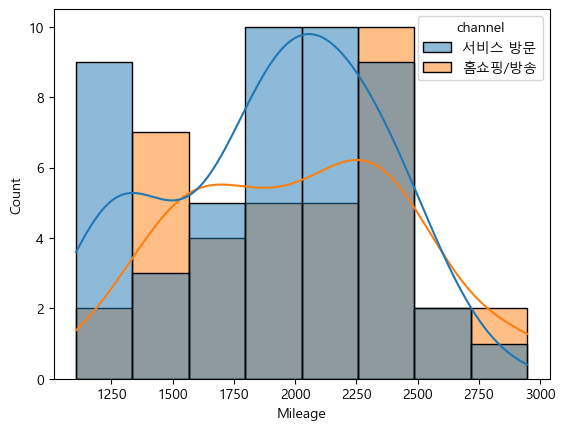

In [55]:
sns.histplot(data=df_channel_Mileage, x='Mileage', kde=True, hue='channel')
# 두개의 분포가 유사함을 시각화로 확인 

In [56]:
stats.ttest_ind(df_service['Mileage'], df_homeshopping['Mileage'], equal_var=True) #등분산 일때
# 내부적으로 표준편차를 가지고 있음. 어디가 중심값인지 나타내줌. 
# 개별값이 ttest의 대표값과 얼마나 떨어져있는가를 알 수 있음
# 분포에서의 편차를 알기 위해씀. 


Ttest_indResult(statistic=-1.1220535809937369, pvalue=0.26503682144324553)